In [1]:
import torch

In [4]:
x = torch.tensor([5,3])
y = torch.tensor([2,1])

In [5]:
print(x*y)

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 0

In [6]:
x = torch.zeros([2,5])

In [7]:
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [8]:
x.shape

torch.Size([2, 5])

In [9]:
y = torch.rand([2,5])

In [10]:
print(y)

tensor([[0.9442, 0.9666, 0.3676, 0.4565, 0.5382],
        [0.2907, 0.0780, 0.3561, 0.9061, 0.5109]])


In [11]:
y.view([1,10])

tensor([[0.9442, 0.9666, 0.3676, 0.4565, 0.5382, 0.2907, 0.0780, 0.3561, 0.9061,
         0.5109]])

In [12]:
print(y)

tensor([[0.9442, 0.9666, 0.3676, 0.4565, 0.5382],
        [0.2907, 0.0780, 0.3561, 0.9061, 0.5109]])


In [13]:
y = y.view([1,10])

In [14]:
print(y)

tensor([[0.9442, 0.9666, 0.3676, 0.4565, 0.5382, 0.2907, 0.0780, 0.3561, 0.9061,
         0.5109]])


In [15]:
# simple mathmematics with array

In [16]:
import torch
import torchvision
from torchvision import transforms, datasets

In [18]:
# most time will be use in prepping data
# Batching
train = datasets.MNIST("data/", train = True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

# STOP finding higher curve learning content, just keep practice
# Tedious work to iterate over data
# for validation, we need out of sample data. Cause machine will keep overfitting
# on in-sample data

# Open parenthesis is for where you want your data to go, for going locally, nothing to specify
test = datasets.MNIST("data/", train = False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))


0.4%

100.1%

Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw


113.5%

Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw


100.4%

Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw


180.4%

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw
Processing...
Done!


In [20]:
# feeding 10 at a time, base 8 number for higher batch size, hoping this data will generalize
# Batching helps regulariztion
trainset = torch.utils.data.DataLoader(train, batch_size =10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size =10, shuffle = True)

In [21]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [22]:
# the last temporary variable in for loop can still be accessible
x, y = data[0][0], data[1][0]
print(y)

tensor(9)


In [23]:
import matplotlib.pyplot as plt

In [26]:
print(data[0][0].shape)
#shaping stuff is important, there is unnecessary 1 at the start for right dimensionality

torch.Size([1, 28, 28])


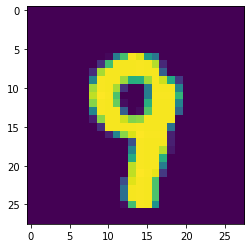

In [28]:
plt.imshow(data[0][0].view(28,28))
plt.show()

In [29]:
# models will just try top decrease loss
# always check for balancing dataset
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

In [30]:
for data in trainset:
    Xs, ys =data
    for y in ys:
        counter_dict[int(y)] += 1
        total +=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [32]:
for i in counter_dict:
    print(f"{i}:{counter_dict[i]/ total*100}")

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


In [33]:
import torch.nn as nn
import torch.nn.functional as F

In [41]:
# If you want the init method of your inherited class to run use super init
# calling paste as pasta
input = 28 * 28
output = 64     # hidden layer ouput
final_output = 10

class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        # forgetting super.__init__ will lead to attribute error
        #fc1 is fully connected
        self.fc1 = nn.Linear(input, output)
        self.fc2 = nn.Linear(output, output)
        self.fc3 = nn.Linear(output, output)
        self.fc4 = nn.Linear(output, final_output)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))  #helper function of pytorch
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim =1) # dim is almost same as axes dim = 0 might means distributing across batch
    
        # you can do fancy things here apart from other libraries, throw logic in here, really advance models, here with pytorch it's really simple and autograd is a boon
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [58]:
# Multi-class distribution we require probability, here we use log softmax
X = torch.rand([28,28])
X = X.view(-1 or 0, 28*28) #flatten
# -1 : meaning it's of any size adding array
# you have to format things exactly how these library exactly want it to be

In [59]:
output = net(X)

In [53]:
output

tensor([[-2.3873, -2.3291, -2.1833, -2.2088, -2.2560, -2.3523, -2.1930, -2.3141,
         -2.4025, -2.4374]], grad_fn=<LogSoftmaxBackward>)

In [98]:
j = torch.rand([3,3])

In [99]:
j

tensor([[0.7472, 0.2198, 0.3444],
        [0.8837, 0.5822, 0.1736],
        [0.9241, 0.4922, 0.1292]])

In [100]:
j.view(3*3)

tensor([0.7472, 0.2198, 0.3444, 0.8837, 0.5822, 0.1736, 0.9241, 0.4922, 0.1292])

In [101]:
j.view(1,3*3)

tensor([[0.7472, 0.2198, 0.3444, 0.8837, 0.5822, 0.1736, 0.9241, 0.4922, 0.1292]])

In [102]:
j.view(-1,3*3)

tensor([[0.7472, 0.2198, 0.3444, 0.8837, 0.5822, 0.1736, 0.9241, 0.4922, 0.1292]])

In [103]:
j

tensor([[0.7472, 0.2198, 0.3444],
        [0.8837, 0.5822, 0.1736],
        [0.9241, 0.4922, 0.1292]])

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters())